<a href="https://colab.research.google.com/github/evafiorina/evafiorina/blob/main/Tugas%206/KMeans_Eva_Fiorina_Siahaan_1103210032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Eva Fiorina Siahaan

NIM : 1103210101

Tugas Minggu 6 : K-Means Clustering

Dataset : Mall Customers

GPT Documentation : https://chat.openai.com/share/57547011-b8a9-4664-826c-a3372a3467e5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Menggunakan path dari Google Drive yang telah di-mount
file_path = "/content/drive/MyDrive/Dataset/Mall_Customers.csv"

# Membaca dataset menjadi DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Preprocessing**

ChatGPT Prompt:

*  Beri kode untuk drop fitur CustomerID
*  Beri kode if else jika dalam dataset terdapat kolom "CustomerID" maka hapus kolom tersebut

In [ ]:
# Periksa apakah kolom "CustomerID" ada dalam DataFrame
if 'CustomerID' in df.columns:
    # Jika kolom "CustomerID" ada, maka hapus kolom tersebut
    df = df.drop(columns=['CustomerID'])
    print("Kolom 'CustomerID' telah dihapus.")
else:
    # Jika kolom "CustomerID" tidak ada, tidak perlu melakukan apa-apa
    print("Tidak ada kolom 'CustomerID' dalam DataFrame.")

# Tampilkan DataFrame setelah menjatuhkan kolom
print(df.info())

Kolom 'CustomerID' telah dihapus.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


ChatGPT Prompt: Beri kode untuk mengubah fitur Genre menjadi Gender

In [ ]:
# Mengubah nama kolom Genre menjadi Gender
df = df.rename(columns={'Genre': 'Gender'})

# Menampilkan DataFrame setelah perubahan
print("\nDataFrame setelah perubahan:")
print(df)


DataFrame setelah perubahan:
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


ChatGPT Prompt : beri kode untuk konversi variabel kategorikal 'Gender' menjadi numerik

In [ ]:
# Menampilkan DataFrame sebelum konversi
print("DataFrame sebelum konversi:")
print(df)

# Mengubah variabel kategorikal Gender menjadi numerik
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Menampilkan DataFrame setelah konversi
print("\nDataFrame setelah konversi:")
print(df)

DataFrame sebelum konversi:
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]

DataFrame setelah konversi:
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2   

ChatGPT Prompt : beri kode untuk Feature Selection dari data diatas menggunakan Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

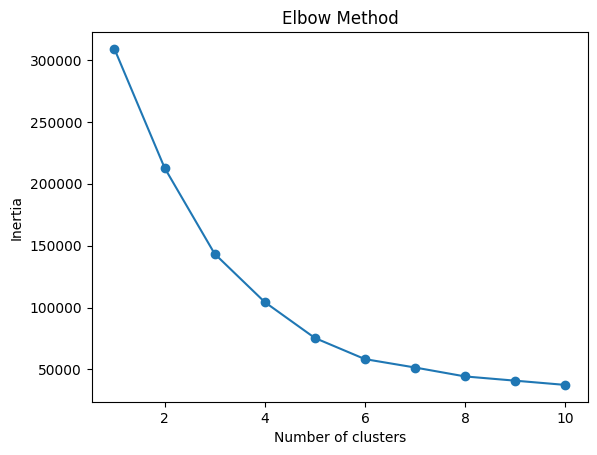

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# menyimpan inertia
inertia = []

# cluster dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

ChatGPT Prompt : beri kode untuk clustering dengan train method

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(df)

df['Cluster'] = kmeans.labels_

print("Hasil Clustering:")
df

Hasil Clustering:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,5
1,0,21,15,81,2
2,1,20,16,6,5
3,1,23,16,77,2
4,1,31,17,40,5
...,...,...,...,...,...
195,1,35,120,79,0
196,1,45,126,28,3
197,0,32,126,74,0
198,0,32,137,18,3


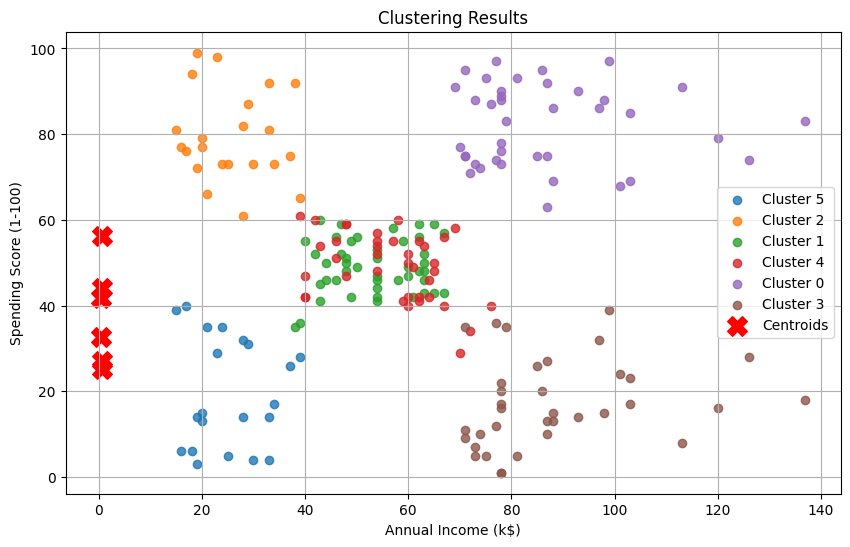

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))

# Plot data untuk setiap klaster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.8)

# Plot pusat klaster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()